# Football death data analysis By Hosein Mirhoseini

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
file_name = "football_deaths.csv"
df = pd.read_csv(file_name)
df

,row_id,incident_date,player_name,player_country,team_country,player_age,player_team_name,incident_description,heart_related,cardiac_related,collapsed,lightning,collision
0,1,1889-01-13,William Cropper,England,England,26.0,Staveley,Ruptured bowel in a match against Grimsby Town...,0,0,0,0,0
1,2,1892-01-11,James Dunlop,Scotland,Scotland,21.0,St Mirren,Tetanus from fall on piece of glass in a frien...,0,0,0,0,0
2,3,1893-11-12,John Henry Morris,England,England,26.0,Shrewsbury Town,Internal haemorrhage following a bad tackle in...,0,0,0,0,0
3,4,1893-11-23,Walter Bannister,England,England,24.0,Chesterfield Town,Rupture of the kidney from a tackle in game ag...,0,0,0,0,0
4,5,1896-03-28,Teddy Smith,England,England,27.0,Bedminster,Suffered severe concussion following a clash o...,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,225,2021-09-04,Jens De Smet,Belgium,Netherlands,27.0,FCC Filosoof,"Drama on Dutch football field, amateur player ...",0,0,1,0,0
225,226,2021-09-25,Guillermo Arias,Venezuela,Venezuela,31.0,Camaguán FC,In the quarterfinals of the third division tou...,0,1,1,0,0
226,227,2021-10-01,Bruno Stein,Germany,Germany,15.0,FC An der Fahner Höhe,Young goalkeeper and amateur angler Bruno Stei...,0,0,0,0,0
227,228,2021-10-08,Benoît Sabard,France,France,49.0,SC Massay,With minutes to go before the end of the game...,0,0,1,0,0


In [3]:
df.describe()

,row_id,player_age,heart_related,cardiac_related,collapsed,lightning,collision
count,229.000000,214.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,115.000000,25.925234,0.340611,0.148472,0.458515,0.030568,0.074236
std,66.250786,6.893150,0.474953,0.356346,0.499368,0.172520,0.262729
min,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,115.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,172.000000,29.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,229.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It's Shoking! we have some player that has died at the age of 13! And also the oldest player to die during a football match was 57! Football really don't care about ages!

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   row_id                229 non-null    int64  
 1   incident_date         229 non-null    object 
 2   player_name           229 non-null    object 
 3   player_country        229 non-null    object 
 4   team_country          227 non-null    object 
 5   player_age            214 non-null    float64
 6   player_team_name      229 non-null    object 
 7   incident_description  229 non-null    object 
 8   heart_related         229 non-null    int64  
 9   cardiac_related       229 non-null    int64  
 10  collapsed             229 non-null    int64  
 11  lightning             229 non-null    int64  
 12  collision             229 non-null    int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 23.4+ KB


In [5]:
youngest_player = df[df['player_age'] == 13]
youngest_player

,row_id,incident_date,player_name,player_country,team_country,player_age,player_team_name,incident_description,heart_related,cardiac_related,collapsed,lightning,collision
148,149,2013-12-23,Jamie Skinner,Scotland,Scotland,13.0,Tynecastle,Cardiac arrest during a game in the Saughton P...,0,1,0,0,0
176,177,2016-08-26,Kieran McDade,Scotland,Scotland,13.0,Dunbeth FC,Suffered a cardiac arrest during football trai...,0,1,0,0,0
198,199,2018-09-01,Tijmen Steenbergen,Netherlands,Netherlands,13.0,VV Marinus van Rooijen 's-Heerenberg,Dutch goalkeeper who died in a C Youth league ...,0,0,0,0,1


WOW! 3 players from age of 13! And they died in this decade which 2 of the deaths if cardiac related and from Scotland. It just show that how can football be hard some times that some 13 year old teenagers lost their lives to it!

# Charts

In [6]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [7]:
df['player_country'].nunique()

82

we have 82 diffrenet country that at least one player from them died during football match

In [8]:
top_countries = df['player_country'].value_counts().head(15)
top_countries

England      29
Nigeria      18
Brazil       14
Romania       9
Scotland      9
France        7
Spain         7
Belgium       6
Cameroon      5
Indonesia     5
Croatia       5
Peru          5
Egypt         4
Germany       4
Portugal      4
Name: player_country, dtype: int64

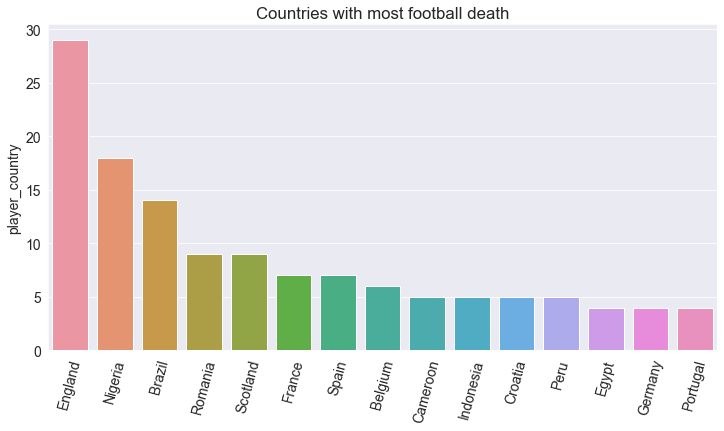

In [9]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Countries with most football death")
sns.barplot(x=top_countries.index, y=top_countries);

It's intresting. Among first three countries we have England and Brazil! Two countries that we know people are insane about football! Can this amazing love of football puts more presure on players shoulders? England has the most deaths by distance!

In [10]:
top_team_countries = df['team_country'].value_counts().head(15)
top_team_countries

England        33
Romania        10
France         10
Brazil          9
Germany         8
Spain           7
Scotland        7
Peru            6
Netherlands     6
Belgium         6
Portugal        6
Croatia         5
Nigeria         5
Indonesia       5
India           4
Name: team_country, dtype: int64

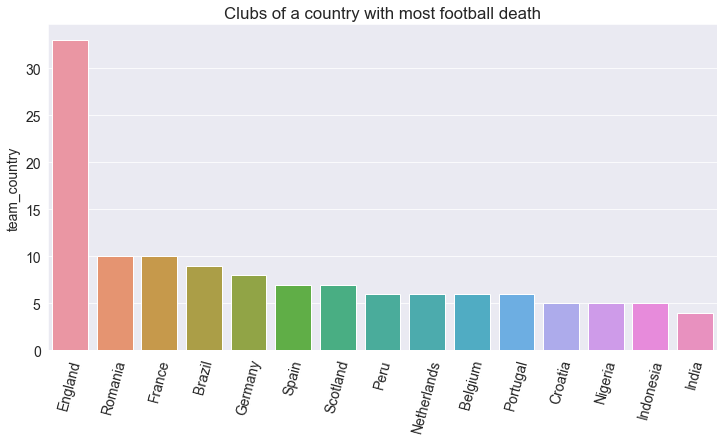

In [11]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Clubs of a country with most football death")
sns.barplot(x=top_team_countries.index, y=top_team_countries);

Again England! The love and madness about football in this country can make things so hard for players! There is a meaningfull distance between England and other countries and it shows that 33 English club has experienced a death of their players during a match!

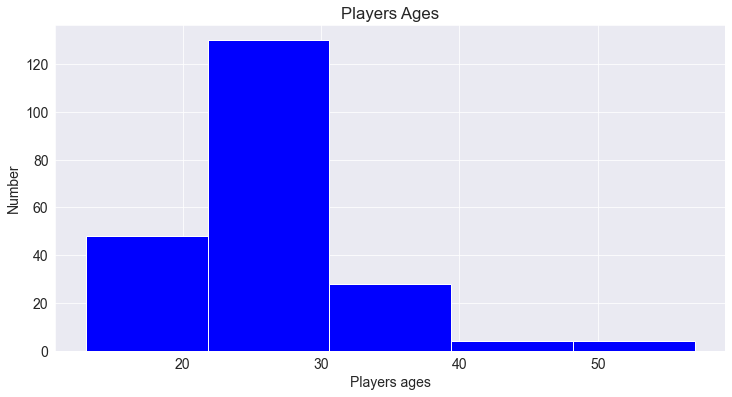

In [12]:

plt.figure(figsize=(12, 6))
plt.title("Players Ages")
plt.xlabel('Players ages')
plt.ylabel('Number')

plt.hist(df['player_age'], bins=5, color='blue');

Most ot the cases are aged between 20 and 30! It's kinda shocking because people during this decade are at the highest level of body health and seeing this just makes us thiking that how can football be brutal and tiring!

In [13]:
import datetime as dt

df['year'] = pd.DatetimeIndex(df['incident_date']).year
df['month'] = pd.DatetimeIndex(df['incident_date']).month

Years with most deaths!

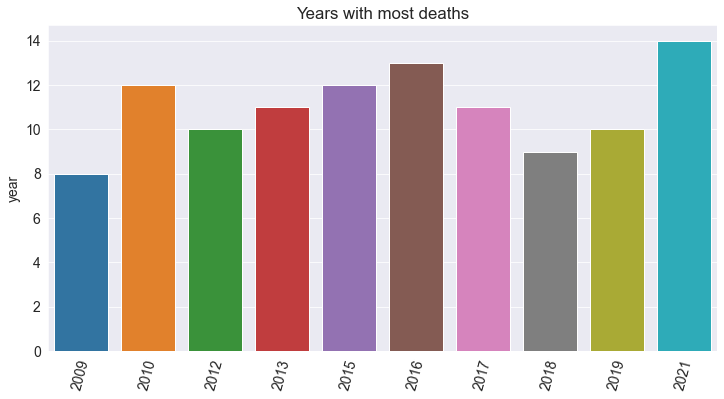

In [14]:
top_years = df['year'].value_counts().head(10)
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title("Years with most deaths")
sns.barplot(x=top_years.index, y=top_years);

As we can see years with most deaths are actually recent years! It means that getting better and better in football technologies that check players health stats every moment did not prevent the happening of death cases! Can the grew of social media put more presure on players?!

# Some facts

Just want to see if a club has more than one case of death!

In [15]:
club_count = df['player_team_name'].value_counts().head(15)
club_count

Retired                     2
Dinamo București            2
Cameroon                    2
USON Mondeville             2
Deportivo Cali              2
JS Kabylie                  2
FC 105 Libreville           2
SC Marchtrenk               1
Deportivo Laferrere         1
G.D. Tourizense             1
Tynecastle                  1
Defence Force               1
Bankstown City FC           1
Persiraja                   1
Deportes Maipo Quilicura    1
Name: player_team_name, dtype: int64

OK! we have it. we have 7 types of clubs or country team with 2 death case! Cameroon natinal team, Dinamo București from Romania, USON Mondeville from France, Deportivo Cali from Colombia, JS Kabylie from Algeria and FC 105 Libreville from Gabon.
How hard can it be for those clubs to have a tragedy repeated.

As we can see in dataset it has 5 different types of reasons for deaths. Let's take a look at them! Because it has binary value we can just sum the values together!

In [16]:
heart_related_cases = df['heart_related'].sum()
cardiac_related_cases = df['cardiac_related'].sum()
collapsed_cases = df['collapsed'].sum()
lightning_cases = df['lightning'].sum()
collision_cases = df['collision'].sum()
print("death by heart related problems",heart_related_cases)
print("death by cardic related problems",cardiac_related_cases)
print("death by collapsed",collapsed_cases)
print("death by lightning",lightning_cases)
print("death by collision",collision_cases)

death by heart related problems 78
death by cardic related problems 34
death by collapsed 105
death by lightning 7
death by collision 17
